# Foundations of Data Science: K-Means Clustering in Python Course Notes

My notes and additional experiments for the Coursera Course

In [1]:
name = "Ryan"
country = "Singapore"

print(f"Hello, I'm {name} from {country}!")

Hello, I'm Ryan from Singapore!


### Activity 2.7
Computing the mean

In [2]:
ages = [20, 27, 40, 50, 60, 10]

summed_ages = sum(ages) #instead of adding up and dividing manually which is tedious and a bad practice
mean_age = summed_ages/len(ages)
mean_age

34.5

---
### Activity 2.8 & 2.9
Numpy [documentation](https://numpy.org/doc/stable/user/basics.creation.html)

In [3]:
import numpy as np
ages = np.array(ages)
np.mean(ages)

34.5

In [4]:
# long way of calculation
mean = ages.mean()
dist = ages - mean 
sq_dist = dist ** 2 # interested in variation (not +ve or -ve)
summed_dist = np.sum(sq_dist)
avg_dist = summed_dist/len(ages)
std_dev = np.sqrt(avg_dist)
std_dev

17.260262647673315

In [5]:
# numpy in-built function
np.std(ages)

17.260262647673315

---
### Activity 3.7
Plotting and Matplotlib
plt.scatter [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

(0.0, 104.4)

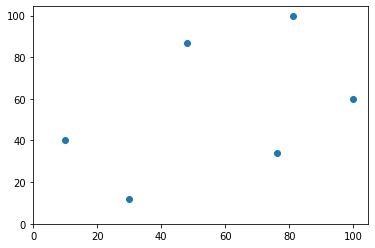

In [6]:
import matplotlib.pyplot as plt
xs = [10, 30, 100, 76, 48, 81]
ys = [40, 12, 60, 34, 87, 100]
plt.scatter(xs, ys)

# start both axes at 0
plt.xlim(xmin=0)
plt.ylim(ymin=0)

---
### Activity 3.8
Multi-dimensional mean

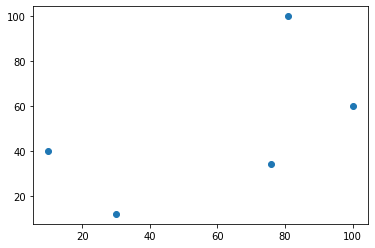

In [7]:
# Store data in 2D array
xys = np.array([[10, 40],[30, 12],[100, 60],[76, 34],[81, 100]])

plt.scatter(xys[:,0], xys[:,1])

In [8]:
# flattened and calculated mean of all
np.mean(xys) 

54.3

In [9]:
# Method 1: "Clunky"
x_mean = np.mean(xys[:,0])
y_mean = np.mean(xys[:,1])
print(x_mean, y_mean, "\n")

# Method 2: built-in fn
mean = np.mean(xys, 0)
mean

59.4 49.2 



array([59.4, 49.2])

---
### Activity 3.9
Graphical Overlays


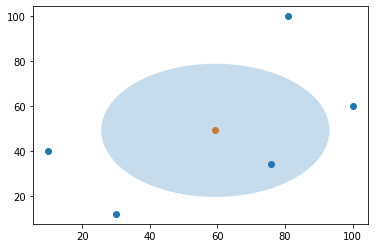

In [10]:
import matplotlib.patches as patches

std_dev = np.std(xys,0)

# [x,y] coord as list, width as height (std)
ellipse = patches.Ellipse([mean[0], mean[1]], std_dev[0]*2, std_dev[1]*2, alpha = 0.25) # alpha adjusts transparency

fig, graph = plt.subplots()
graph.scatter(xys[:,0], xys[:,1])
graph.scatter(mean[0], mean[1])
graph.add_patch(ellipse) 

---
### Activity 3.10 & 11
Distance of Points from Mean

In [11]:
# Calculating Euclidean Distance of 1st point from Mean 

# Method 1
r1 = np.sqrt(np.sum((xys[0] - mean)**2))

# Method 2
r2 = np.linalg.norm(xys[0] - mean)

print(r1 == r2)
print(r1)

True
50.24937810560445


For the `i`th iteration
Calculating for multiple points requires repeating the formula: `np.linalg.norm(xys[i] - mean)`

In [12]:
dists = [np.linalg.norm(xy - mean) for xy in xys]
dists

[50.24937810560445,
 47.415187440312835,
 42.01190307520001,
 22.50777643393501,
 55.20144925633746]

---
### Activity 3.12
Normalization

In [13]:
x_min, x_max = np.min(xys[:,0]), np.max(xys[:,0])

normed_x = (xys[:,0] - x_min)/(x_max-x_min)
normed_x

array([0.        , 0.22222222, 1.        , 0.73333333, 0.78888889])

---
### Activity 4.1
Pandas to read file

In [15]:
import pandas as pd
data = pd.read_csv('happyscore_income.csv')
df = pd.DataFrame(data)
df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [16]:
happy = data['happyScore']
income = data['avg_income']

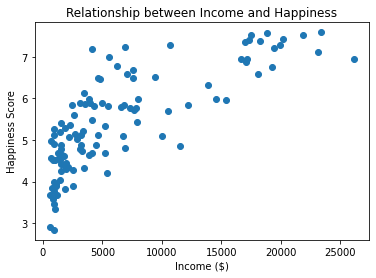

In [17]:
plt.scatter(income, happy)
plt.title('Relationship between Income and Happiness')
plt.xlabel('Income ($)')
plt.ylabel('Happiness Score')
plt.show()

---
### Activity 4.1a
Sorting & Filtering

In [18]:
data.sort_values("avg_income", inplace = True) # sorts by avg income asc
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


In [19]:
richest = data[data['avg_income'] > 15000]
richest

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595000,13163.070000,34.126250,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770000,13823.160000,32.418750,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550000,14172.735000,34.432500,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505000,15166.455000,28.745000,'Western Europe',6.937,1.30782,Belgium
33,Finland,70.0,7.9,1.53,17310.195000,14962.560000,27.723750,'Western Europe',7.406,1.29025,Finland
27,Denmark,74.0,8.4,1.53,17496.510000,15630.885000,28.155000,'Western Europe',7.527,1.32548,Denmark
34,France,52.0,6.4,2.15,18096.788571,14971.251429,32.255714,'Western Europe',6.575,1.27778,France
76,Netherlands,69.0,7.6,1.38,18234.435000,15880.545000,29.271250,'Western Europe',7.378,1.32944,Netherlands
48,Iceland,71.0,8.1,1.64,18828.345000,16179.315000,28.780000,'Western Europe',7.561,1.30232,Iceland


To filter for the country with the `lowest` average income in the `richest` dataframe, we write:

In [20]:
richest.iloc[0] 

country                             Italy
adjusted_satisfaction                  57
avg_satisfaction                      6.6
std_satisfaction                     1.81
avg_income                        15437.6
median_income                     13163.1
income_inequality                 34.1262
region                   'Western Europe'
happyScore                          5.948
GDP                               1.25114
country.1                           Italy
Name: 49, dtype: object

To filter for the country with the `highest` average income in the `richest` dataframe, we write:

In [21]:
richest.iloc[-1] 

country                        Luxembourg
adjusted_satisfaction                  66
avg_satisfaction                      7.7
std_satisfaction                     1.76
avg_income                        26182.3
median_income                     22240.2
income_inequality                   31.95
region                   'Western Europe'
happyScore                          6.946
GDP                               1.56391
country.1                      Luxembourg
Name: 61, dtype: object

In [22]:
rich_mean = np.mean(richest['avg_income'])
rich_mean

19266.680753968256

In [23]:
all_mean = np.mean(data['avg_income'])
all_mean

6442.751416214639

---
### Activity 4.1b & c
Labelling Points on a graph
* [pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html)

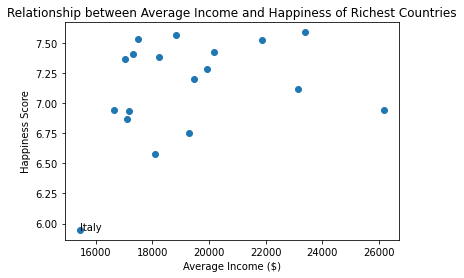

In [24]:
plt.scatter(richest['avg_income'], richest['happyScore'])

# text for the 1st country
plt.text(richest.iloc[0]['avg_income'],
        richest.iloc[0]['happyScore'],
        richest.iloc[0]['country']) # xpos, ypos, text to be specified
plt.title('Relationship between Average Income and Happiness of Richest Countries')
plt.xlabel('Average Income ($)')
plt.ylabel('Happiness Score')
plt.show()

We use the `iterrows` method to iterate over the dataset.

When I tried this, the code doesn't seem to work: `ValueError: Image size of 8765925x1689 pixels is too large. 
It must be less than 2^16 in each direction.`

```
for k, row in richest.iterrows():
    plt.text(x = row['avg_income'],
             y = row['happyScore'],
             s = row['country'])
```

---
### Activity 4.2
Making sense of the data (Eyeballing)

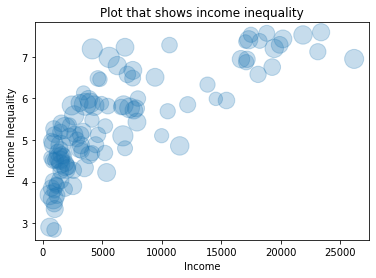

In [25]:
inequ = data['income_inequality']
plt.title('Plot that shows income inequality')
plt.xlabel('Income')
plt.ylabel('Income Inequality')
plt.scatter(income, happy, s = inequ*7.5, alpha = 0.25)

---
### Activity 4.3
Using [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [26]:
from sklearn.cluster import KMeans
import numpy as np

income_happy = np.column_stack((income, happy))
np.set_printoptions(suppress=True) # remove e^x etc
kmeans_result = KMeans(n_clusters = 3).fit(income_happy)


In [27]:
kmeans_result.cluster_centers_

array([[ 2199.1212108 ,     4.75472308],
       [18759.30217857,     7.0327    ],
       [ 7577.55711256,     5.85080769]])

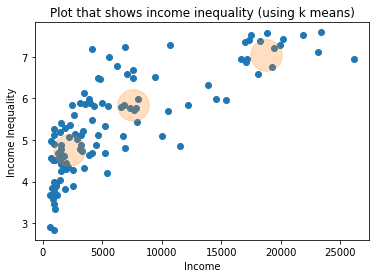

In [28]:
clusters = kmeans_result.cluster_centers_
plt.title('Plot that shows income inequality (using k means)')
plt.xlabel('Income')
plt.ylabel('Income Inequality')
plt.scatter(income, happy)
plt.scatter(clusters[:,0], clusters[:,1], s = 1000, alpha = 0.25)